<a href="https://colab.research.google.com/github/tasniat/Micro-Credential/blob/main/MLProjectKNN%26RandomForest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Project Goal:** The goal for this project is to use the given dataset of inpatient, diabetic encounters to figure out the likelihoods of a patient readmitting and, if they do, if they readmit within 30 days or after 30 days. 


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
#Stored my chosen dataset in a variable called 'df'
#The dataset was from a larger database pertaining to US hospitals, but the dataset here was specifically for inpatient, diabetic encounters
#The information included in the dataset ranged from race, gender, and age, to medications, diagnoses, and lab tests
df = pd.read_csv('https://raw.githubusercontent.com/niteen11/cuny_lagcc_micro_credential_data_analytics/main/Track%20A/Unit%204%20-%20Machine%20Learning%20and%20Modeling%20Techniques/Dataset/diabetic_data.csv')
df

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,?,Pediatrics-Endocrinology,41,0,1,0,0,0,250.83,?,?,1,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,?,?,59,0,18,0,0,0,276,250.01,255,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,?,?,11,5,13,2,0,1,648,250,V27,6,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,?,?,44,1,16,0,0,0,8,250.43,403,7,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,?,?,51,0,8,0,0,0,197,157,250,5,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,443847548,100162476,AfricanAmerican,Male,[70-80),?,1,3,7,3,MC,?,51,0,16,0,0,0,250.13,291,458,9,None,>8,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Down,No,No,No,No,No,Ch,Yes,>30
101762,443847782,74694222,AfricanAmerican,Female,[80-90),?,1,4,5,5,MC,?,33,3,18,0,0,1,560,276,787,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,No,Yes,NO
101763,443854148,41088789,Caucasian,Male,[70-80),?,1,1,7,1,MC,?,53,0,9,1,0,0,38,590,296,13,None,None,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Down,No,No,No,No,No,Ch,Yes,NO
101764,443857166,31693671,Caucasian,Female,[80-90),?,2,3,7,10,MC,Surgery-General,45,2,21,0,0,1,996,285,998,9,None,None,No,No,No,No,No,No,Steady,No,No,Steady,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO


In [ ]:
#I wanted to get an overview of how the dataset looked numerically and see how skewed my data was/was not
df.describe()

,encounter_id,patient_nbr,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
count,1.017660e+05,1.017660e+05,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000
mean,1.652016e+08,5.433040e+07,2.024006,3.715642,5.754437,4.395987,43.095641,1.339730,16.021844,0.369357,0.197836,0.635566,7.422607
std,1.026403e+08,3.869636e+07,1.445403,5.280166,4.064081,2.985108,19.674362,1.705807,8.127566,1.267265,0.930472,1.262863,1.933600
min,1.252200e+04,1.350000e+02,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,8.496119e+07,2.341322e+07,1.000000,1.000000,1.000000,2.000000,31.000000,0.000000,10.000000,0.000000,0.000000,0.000000,6.000000
50%,1.523890e+08,4.550514e+07,1.000000,1.000000,7.000000,4.000000,44.000000,1.000000,15.000000,0.000000,0.000000,0.000000,8.000000
75%,2.302709e+08,8.754595e+07,3.000000,4.000000,7.000000,6.000000,57.000000,2.000000,20.000000,0.000000,0.000000,1.000000,9.000000
max,4.438672e+08,1.895026e+08,8.000000,28.000000,25.000000,14.000000,132.000000,6.000000,81.000000,42.000000,76.000000,21.000000,16.000000


In [ ]:
#I chose to drop all the data that I deemed clutter or unnecessary, namely the id columns 
#I also chose to drop all the specific medication columsns and keep the change in meds and diabetic medications columns 
df.drop(['weight','encounter_id','admission_type_id', 'discharge_disposition_id', 'admission_source_id', 'payer_code', 'medical_specialty', 'patient_nbr', 'diag_1', 'diag_2', 'diag_3','metformin','repaglinide','nateglinide','chlorpropamide','glimepiride','acetohexamide','glipizide','glyburide','tolbutamide','pioglitazone','rosiglitazone','acarbose','miglitol','troglitazone','tolazamide','examide','citoglipton','insulin','glyburide-metformin','glipizide-metformin','glimepiride-pioglitazone','metformin-rosiglitazone','metformin-pioglitazone','A1Cresult','max_glu_serum'], inplace=True, axis=1)
df

,race,gender,age,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,change,diabetesMed,readmitted
0,Caucasian,Female,[0-10),1,41,0,1,0,0,0,1,No,No,NO
1,Caucasian,Female,[10-20),3,59,0,18,0,0,0,9,Ch,Yes,>30
2,AfricanAmerican,Female,[20-30),2,11,5,13,2,0,1,6,No,Yes,NO
3,Caucasian,Male,[30-40),2,44,1,16,0,0,0,7,Ch,Yes,NO
4,Caucasian,Male,[40-50),1,51,0,8,0,0,0,5,Ch,Yes,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,AfricanAmerican,Male,[70-80),3,51,0,16,0,0,0,9,Ch,Yes,>30
101762,AfricanAmerican,Female,[80-90),5,33,3,18,0,0,1,9,No,Yes,NO
101763,Caucasian,Male,[70-80),1,53,0,9,1,0,0,13,Ch,Yes,NO
101764,Caucasian,Female,[80-90),10,45,2,21,0,0,1,9,Ch,Yes,NO


In [ ]:
#I want to see what all the unique values are in the race column so I can replace them all later on
df.race.unique

<bound method Series.unique of 0               Caucasian
1               Caucasian
2         AfricanAmerican
3               Caucasian
4               Caucasian
               ...       
101761    AfricanAmerican
101762    AfricanAmerican
101763          Caucasian
101764          Caucasian
101765          Caucasian
Name: race, Length: 101766, dtype: object>

In [ ]:
#I created a dictionary to store the values given in the race column in the dataset as keys and assign them numerical values
#so I could replace them in the dataset. This will help my KNN and RandomForest models run more efficiently 
race_dict = {'?':0, 'AfricanAmerican':1, 'Asian':2, 'Caucasian':3, 'Hispanic':4, 'Other':5}
race_dict

{'?': 0,
 'AfricanAmerican': 1,
 'Asian': 2,
 'Caucasian': 3,
 'Hispanic': 4,
 'Other': 5}

In [ ]:
#I replaced the string values in the race column with integer values using my dictionary
df.race = [race_dict[item] for item in df.race] 
print(df)

        race  gender      age  ...  change  diabetesMed  readmitted
0          3  Female   [0-10)  ...      No           No          NO
1          3  Female  [10-20)  ...      Ch          Yes         >30
2          1  Female  [20-30)  ...      No          Yes          NO
3          3    Male  [30-40)  ...      Ch          Yes          NO
4          3    Male  [40-50)  ...      Ch          Yes          NO
...      ...     ...      ...  ...     ...          ...         ...
101761     1    Male  [70-80)  ...      Ch          Yes         >30
101762     1  Female  [80-90)  ...      No          Yes          NO
101763     3    Male  [70-80)  ...      Ch          Yes          NO
101764     3  Female  [80-90)  ...      Ch          Yes          NO
101765     3    Male  [70-80)  ...      No           No          NO

[101766 rows x 14 columns]


In [ ]:
#I then did the same thing I did with the race column with all the other columns that contained non-integer values
gender_dict = {'Female':0, 'Male':1, 'Unknown/Invalid':2}
df.gender = [gender_dict[item] for item in df.gender] 
age_dict = {'[0-10)':0, '[10-20)':1, '[20-30)':2, '[30-40)':3, '[40-50)':4, '[50-60)':5, '[60-70)':6, '[70-80)':7, '[80-90)':8, '[90-100)':9}
df.age = [age_dict[item] for item in df.age] 
change_dict = {'No':0, 'Ch':1}
df.change = [change_dict[item] for item in df.change] 
diabetesMed_dict = {'No':0, 'Yes':1}
df.diabetesMed = [diabetesMed_dict[item] for item in df.diabetesMed]
readmitted_dict = {'NO':0, '>30':1, '<30':2}
df.readmitted = [readmitted_dict[item] for item in df.readmitted]
df

,race,gender,age,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,change,diabetesMed,readmitted
0,3,0,0,1,41,0,1,0,0,0,1,0,0,0
1,3,0,1,3,59,0,18,0,0,0,9,1,1,1
2,1,0,2,2,11,5,13,2,0,1,6,0,1,0
3,3,1,3,2,44,1,16,0,0,0,7,1,1,0
4,3,1,4,1,51,0,8,0,0,0,5,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,1,1,7,3,51,0,16,0,0,0,9,1,1,1
101762,1,0,8,5,33,3,18,0,0,1,9,0,1,0
101763,3,1,7,1,53,0,9,1,0,0,13,1,1,0
101764,3,0,8,10,45,2,21,0,0,1,9,1,1,0


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


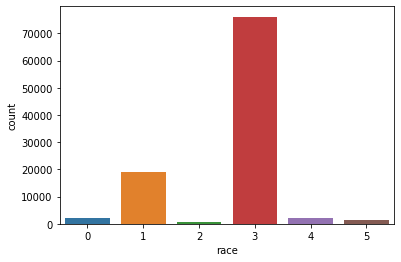

In [ ]:
#I chose to make a countplot based on race to see if there was a disparity in the representation of each race in the given dataset
#The results were quite shocking, with an overwhelming Caucasian representation
#There was some African-American representation, but little to nothing for the other races in the dataset
sns.countplot(df['race'], label='Count')

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


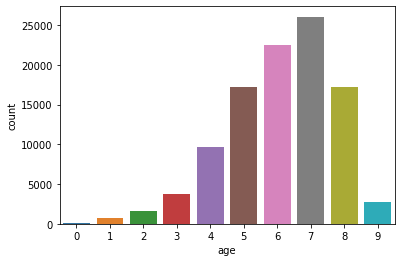

In [ ]:
#I wanted to see the age distribution in the dataset
sns.countplot(df['age'], label='Count')

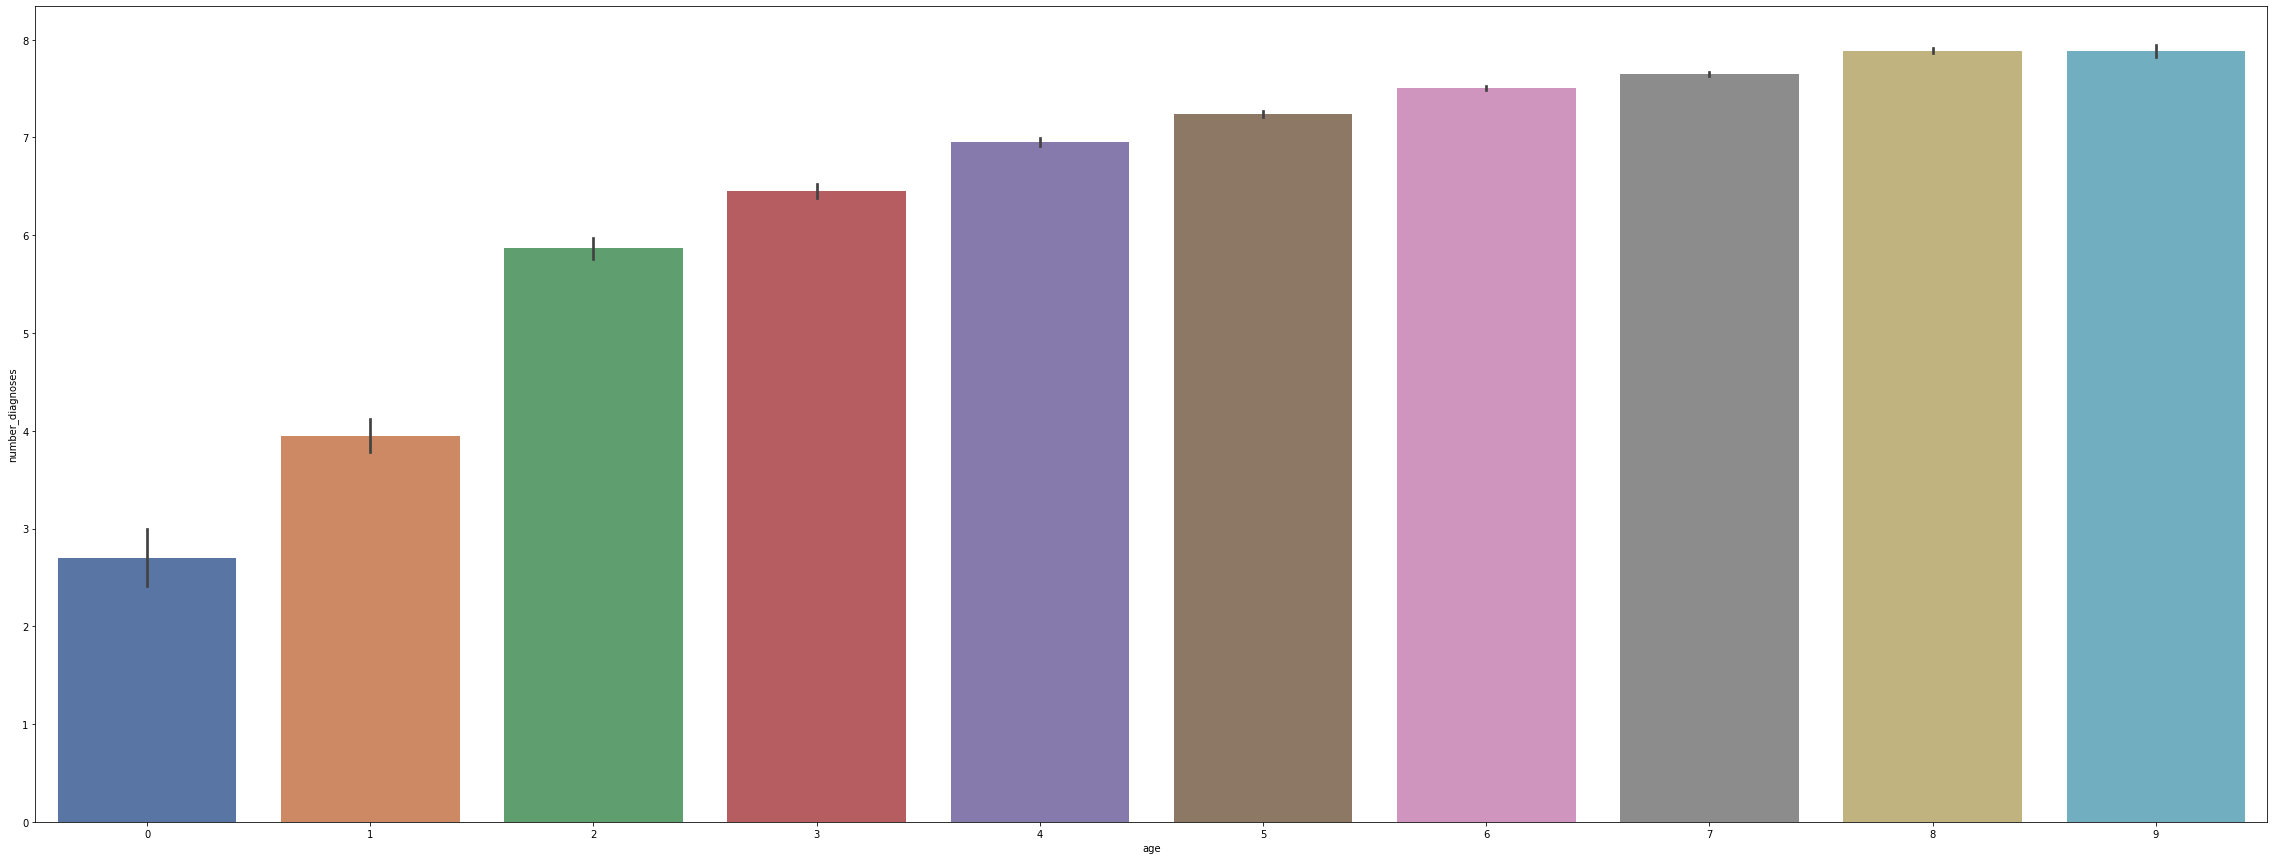

In [ ]:
#I wanted to see how age correlated to the number of diagnoses
plt.figure(figsize=(40,15))
sns.barplot(x='age',y='number_diagnoses',data=df,palette='deep')

In [ ]:
#I used the sklearn library and imported the StandardScaler to standardize my data values
#Some columns have bigger values that can lead to the skewing of the data, especially since the KNN model relies on having accurate nearest neighbors
#The StandardScaler will standardize all the values so that the datapoints are accurately placed in the graph 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
#I dropped the target column so that I could fit the data I would use to predict the target
scaler.fit(df.drop('readmitted', axis=1))
StandardScaler(copy=True, with_mean=True, with_std=True)
scaled_features = scaler.transform(df.drop('readmitted',axis=1))
df_feat = pd.DataFrame(scaled_features,columns=df.columns[:-1])
df_feat.head()

,race,gender,age,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,change,diabetesMed
0,0.427557,-0.927397,-3.824600,-1.137649,-0.106517,-0.785398,-1.848268,-0.291461,-0.21262,-0.503276,-3.321596,-0.926591,-1.829868
1,0.427557,-0.927397,-3.197277,-0.467653,0.808384,-0.785398,0.243390,-0.291461,-0.21262,-0.503276,0.815784,1.079225,0.546488
2,-1.703706,-0.927397,-2.569954,-0.802651,-1.631351,2.145781,-0.371804,1.286748,-0.21262,0.288579,-0.735733,-0.926591,0.546488
3,0.427557,1.078031,-1.942632,-0.802651,0.045967,-0.199162,-0.002688,-0.291461,-0.21262,-0.503276,-0.218561,1.079225,0.546488
4,0.427557,1.078031,-1.315309,-1.137649,0.401761,-0.785398,-0.986997,-0.291461,-0.21262,-0.503276,-1.252906,1.079225,0.546488


In [ ]:
#I am now importing KNN classifier to perform KNN on my dataset
from sklearn.neighbors import KNeighborsClassifier

#I set n_neighbors to 319 because there were 101,766 datapoints in my dataset and the square root of the total datapoints appears to be 
#the best number to select when figuring out how many nearest neighbors a model should use to make predictions 
model = KNeighborsClassifier(n_neighbors=319)

In [ ]:
#Drop the target column from x so we could use x as the data the model will use to predict the target
x = df.drop(['readmitted'],axis=1)
x

,race,gender,age,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,change,diabetesMed
0,3,0,0,1,41,0,1,0,0,0,1,0,0
1,3,0,1,3,59,0,18,0,0,0,9,1,1
2,1,0,2,2,11,5,13,2,0,1,6,0,1
3,3,1,3,2,44,1,16,0,0,0,7,1,1
4,3,1,4,1,51,0,8,0,0,0,5,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,1,1,7,3,51,0,16,0,0,0,9,1,1
101762,1,0,8,5,33,3,18,0,0,1,9,0,1
101763,3,1,7,1,53,0,9,1,0,0,13,1,1
101764,3,0,8,10,45,2,21,0,0,1,9,1,1


In [ ]:
#Set y equal to the target column
y = df['readmitted']

In [ ]:
#I am importing train_test_split so that I could split my dataset into training data to train my model and 
#testing data to test the accuracy of my model
from sklearn.model_selection import train_test_split

#I chose to set the test_size to 0.2 so that 80% of the dataset could be devoted to training the model to help it become more accurate 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=5)

In [ ]:
#I fit my model with the training data
model.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=319, p=2,
                     weights='uniform')

In [ ]:
#I then tested my model with the testing data and assigned the predictions to the variable y_pred
y_pred = model.predict(x_test)

In [ ]:
#I wanted to see how accurate my KNN model was and the results show that it was about as accurate as a coin flip
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.5520782155841604


In [ ]:
#I once again imported train_test_split, but this was more for show than functionality 
#I wanted to show a clear new beginning because I am now going to be making a RandomForest model 
from sklearn.model_selection import train_test_split

#I once again chose to set the test_size to 0.2 so that 80% of the dataset could be devoted to training the model to help it become more accurate 
#The x and y being used are still the same as before
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = 5)

In [ ]:
#I was curious about the shape of my data
x_train.shape

(81412, 13)

In [ ]:
#I am now importing RandomForest classifier to make a model with RandomForest
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier

#I fit my training data with the Randomforest classifier
randomforest_classifier = RandomForestClassifier(n_estimators = 100, criterion = 'entropy')
randomforest_classifier.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
#I tested my model to see how well it worked with the training data 
y_predict_train = randomforest_classifier.predict(x_train)
cm_train = confusion_matrix(y_train, y_predict_train)

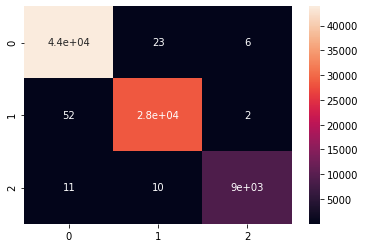

In [ ]:
#The results were very promising, with the model making very little error 
sns.heatmap(cm_train, annot=True)

In [ ]:
#I then printed out a classification report so I could see just how accurate my model was with the training data 
#The results showed that it was essentially 100% precise and that led me to be concerned that perhaps my model overfit the data
#I became worried that the testing data predictions would be much less accurate due to potential overfitting
print(classification_report(y_train, y_predict_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     43895
           1       1.00      1.00      1.00     28507
           2       1.00      1.00      1.00      9010

    accuracy                           1.00     81412
   macro avg       1.00      1.00      1.00     81412
weighted avg       1.00      1.00      1.00     81412



In [ ]:
#I am now testing my model with the testing data
y_predict_test = randomforest_classifier.predict(x_test)
cm_test = confusion_matrix(y_test, y_predict_test)

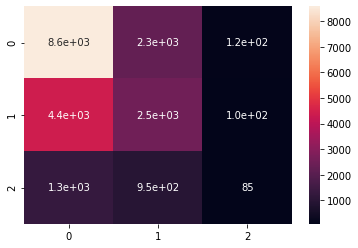

In [ ]:
#The results seemed to confirm my fears, the model was making many mistakes
sns.heatmap(cm_test, annot=True)

In [ ]:
#I printed out a classification report to see how accurate the model was with the testing data
#The results showed that for it was more accurate when determining if a patient would not be readmitted to the hospital, 
#but was much less accurate with determing if a patient would be readmitted and, if so, within which of the two timeframes 
print(classification_report(y_test, y_predict_test))

              precision    recall  f1-score   support

           0       0.60      0.78      0.68     10969
           1       0.44      0.36      0.39      7038
           2       0.27      0.04      0.06      2347

    accuracy                           0.55     20354
   macro avg       0.44      0.39      0.38     20354
weighted avg       0.51      0.55      0.51     20354

